In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Select region of interest from an image

This example shows how to crop an image using `nanomesh`.

In [2]:
from nanomesh import Volume
vol = Volume.load('sample_data.npy')
plane = vol.select_plane(x=161)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Use `.select_roi` to open an interactive widget. Select a region of interest in the figure by enclosing them within a polygon. A rectangle is fitted to the polygon.

- Press the 'esc' key to start a new polygon
- Hold the 'shift' key to move all of the vertices
- Hold the 'ctrl' key to move a single vertex

<IPython.core.display.Javascript object>


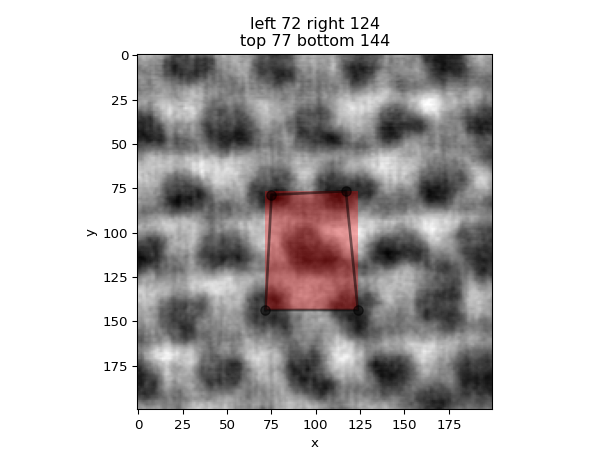

In [3]:
roi = plane.select_roi()

The `.bbox` attribute is updated when the selection above changes.

In [4]:
roi.bbox

array([[123.73791762,  76.55626329],
       [ 71.65458428,  76.55626329],
       [ 71.65458428, 143.52054901],
       [123.73791762, 143.52054901]])

Use the `.crop_to_roi` method to extract the region of interest.

<IPython.core.display.Javascript object>


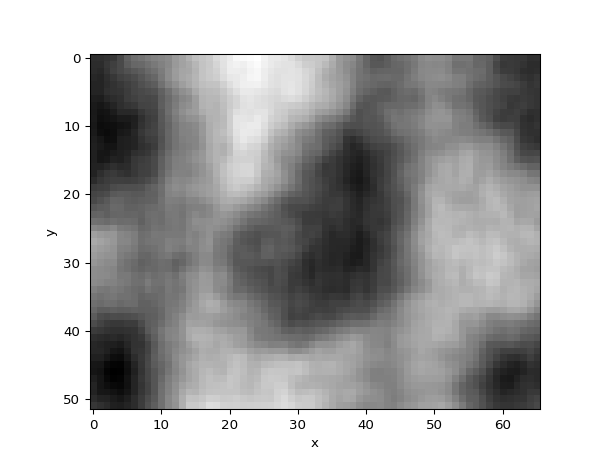

<AxesSubplot:xlabel='x', ylabel='y'>

In [5]:
plane_roi = plane.crop_to_roi(bbox=roi.bbox)
plane_roi.show()

### Manual cropping

Alternatively, if you know which points to extract from the  to 

Use the `minimum_bounding_rectangle` function to fit the smallest rectangle around the given points.

The example below demonstrates this on a slanted square. Well, almost, because the coordinates contain a small error to demonstrate the function.

In [6]:
from nanomesh.image import minimum_bounding_rectangle
import numpy as np

roi = np.array([
    [ 60,  60],
    [110, 110],
    [ 60, 145],  # <- should be 150
    [ 10, 110],
])

bbox = minimum_bounding_rectangle(roi)
bbox

array([[110., 110.],
       [ 60.,  60.],
       [ 10., 110.],
       [ 60., 160.]])

The bounding box (`bbox`) can then be used to extract this region from the image using `extract_rectangle`. If the bounding box is slanted, the image will be straightened using an Euclidean transform.

<IPython.core.display.Javascript object>


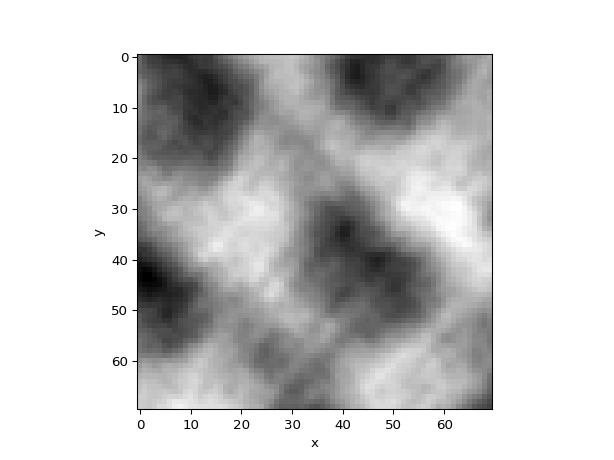

<AxesSubplot:xlabel='x', ylabel='y'>

In [7]:
from nanomesh.image import extract_rectangle

cropped = plane.apply(extract_rectangle, bbox=bbox)
cropped.show()